# TF-IDF Scripts

### Import Libraries

In [64]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk import word_tokenize, pos_tag_sents, pos_tag
import re
from bs4 import BeautifulSoup
import unicodedata
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from string import punctuation
import os, glob
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kylet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Custom Functions and File Imports

In [65]:
stemming = PorterStemmer()
stops = set(stopwords.words("english")) 

def removeStopWords(row):
    stemmed = row['stemmed']
    cleaned = [w for w in stemmed if not w in stops]
    cleaned = listToString(cleaned)
    return cleaned

def tokenize(row):
    message = row['message'].lower()
    tokens = word_tokenize(message)
    tok_words = [w for w in tokens if w.isalpha()]
    return tok_words
    
def stem(row):
    tokens = row['tokenized']
    stemmed = [stemming.stem(word) for word in tokens]
    return stemmed

def listToString(lst):
    text = ' '.join(lst)
    return text

In [66]:
os.chdir(r"D:\Programs\Jupyter Notebooks\Thesis RIP Scripts\Annotations\nogla0") # CHANGE VALUE PER BATCH
files = []
for file in glob.glob("*.csv"):
    print(file)
    files.append(file)
    
print(files)    

annotatorA.csv
annotatorB.csv
annotatorC.csv
['annotatorA.csv', 'annotatorB.csv', 'annotatorC.csv']


In [67]:
coder1 = pd.read_csv(files[0])
coder1.fillna(0)
coder2 = pd.read_csv(files[1])
coder2.fillna(0)
#coder3 = pd.read_excel('usanews0full_3.xlsx')
coder3 = pd.read_csv(files[2])
coder3.fillna(0)

,Unnamed: 0,author,message,time_text,Direct Harassment,Hate Speech,Sexual Harassment,Trolling,Others,Toxic
0,0,username@add oadyo,:buffering:,0:01:00,0.0,0.0,0.0,0.0,0.0,0.0
1,1,username@leunAAAzNz,Who’s playing with him,0:01:00,0.0,0.0,0.0,0.0,0.0,0.0
2,2,username@ERETATTAPM,Hey guys!!!!,0:05:00,0.0,0.0,0.0,0.0,0.0,0.0
3,3,username@cazzii ooe,late,0:07:00,0.0,0.0,0.0,0.0,0.0,0.0
4,4,username@cTrTWyWeTy,okay every stop for a sec!!!!!,0:08:00,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6926,6926,username@asDaaaskao,gg,3:27:47,0.0,0.0,0.0,0.0,0.0,0.0
6927,6927,username@nTiiyeelFe,gg,3:27:55,0.0,0.0,0.0,0.0,0.0,0.0
6928,6928,username@mnene8mkoy,night nogla,3:27:57,0.0,0.0,0.0,0.0,0.0,0.0
6929,6929,username@asDaaaskao,have a goodnight Nogla!,3:27:58,0.0,0.0,0.0,0.0,0.0,0.0


### Combine Documents Per Label

In [68]:
dHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Direct Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Direct Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Direct Harassment'] == 1.0]

dHarassment = pd.concat([temp0, temp1, temp2])
dHarassment.drop(dHarassment.columns.difference(['Unnamed: 0', 'message','Direct Harassment']), 1, inplace=True)

dHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
dHarassment
#duplicateRowsDF = dHarassment[dHarassment.duplicated()]
#duplicateRowsDF

,Unnamed: 0,message,Direct Harassment
3371,3371,zeke u r racist,1.0
4218,4218,F trump and the little d**k white boys who vot...,1.0
4579,4579,joe biden likes kids,1.0
80,80,Creeper!!!!!!!!!!!,1.0
1139,1139,Nogla votes way too fucking fast every round.,1.0
...,...,...,...
6502,6502,Y’all b*tches are annoying. Just watch the dam...,1.0
6520,6520,how are politics on noglas stream hes like the...,1.0
6632,6632,this game reveals that everyone is an ASSHOLE,1.0
6875,6875,"""THATS TWO DOWN, MUTHAF**KA~!!!!!!"" 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...",1.0


In [69]:
hSpeech = pd.DataFrame()
temp0 = coder1.loc[coder1['Hate Speech'] == 1.0]
temp1 = coder2.loc[coder2['Hate Speech'] == 1.0]
temp2 = coder3.loc[coder3['Hate Speech'] == 1.0]

hSpeech = pd.concat([temp0, temp1, temp2])
hSpeech.drop(hSpeech.columns.difference(['Unnamed: 0', 'message','Hate Speech']), 1, inplace=True)

hSpeech.drop_duplicates(subset ="message", keep = False, inplace = True)
hSpeech

,Unnamed: 0,message,Hate Speech
564,564,The travis scott burger is ass,1.0
1290,1290,why would you hope Nogla and Alyiah break up. ...,1.0
1456,1456,"idk why this game is so popular, it seems so b...",1.0
1931,1931,deluxe is annoying,1.0
2048,2048,pete is a fuckin idiot...,1.0
...,...,...,...
6414,6414,Lol it’s the same 5 niggas spamming,1.0
6428,6428,Democrats are the party of slavery,1.0
6455,6455,blm bad,1.0
6481,6481,"Nogla and I quote ""It's one of the fucking bla...",1.0


In [70]:
sHarassment = pd.DataFrame()
temp0 = coder1.loc[coder1['Sexual Harassment'] == 1.0]
temp1 = coder2.loc[coder2['Sexual Harassment'] == 1.0]
temp2 = coder3.loc[coder3['Sexual Harassment'] == 1.0]

sHarassment = pd.concat([temp0, temp1, temp2])
sHarassment.drop(sHarassment.columns.difference(['Unnamed: 0', 'message','Sexual Harassment']), 1, inplace=True)

sHarassment.drop_duplicates(subset ="message", keep = False, inplace = True)
sHarassment

,Unnamed: 0,message,Sexual Harassment
4295,4295,You guys suck small wieners,1.0
4348,4348,Bruh y’all being gay,1.0
4549,4549,yay your gay way too go my guy,1.0
4679,4679,i like cock,1.0
4802,4802,#only2genders,1.0
4809,4809,gen z is filled with so many gays smh,1.0
5393,5393,YOU LGBT DAWGGY?,1.0
5555,5555,YOU LGBT DAWGGY? GUCCI GANG WAAAt,1.0
506,506,#moistfornogla,1.0
565,565,#moistforme:)),1.0


In [71]:
trolling = pd.DataFrame()
temp0 = coder1.loc[coder1['Trolling'] == 1.0]
temp1 = coder2.loc[coder2['Trolling'] == 1.0]
temp2 = coder3.loc[coder3['Trolling'] == 1.0]

trolling = pd.concat([temp0, temp1, temp2])
trolling.drop(trolling.columns.difference(['Unnamed: 0', 'message','Trolling']), 1, inplace=True)

trolling.drop_duplicates(subset ="message", keep = False, inplace = True)
trolling

,Unnamed: 0,message,Trolling
611,611,I'm done all of this videos I'm gonna to end m...,1.0
2889,2889,My wife left me and took the kids,1.0
3013,3013,BLM IS A JOKE ITS ANARCHY AND TERRORISM,1.0
3039,3039,BLM IS A TERRORIST ORGANIZATION,1.0
3110,3110,(B)ig (L)osers (M)arginalized,1.0
...,...,...,...
5149,5149,Bidn B Hidin😃,1.0
5332,5332,We are all humans why can't we just get along....,1.0
6165,6165,Chat is back boys! Bring the P word and Below ...,1.0
6269,6269,y'all need school if you going to argue amendm...,1.0


In [72]:
others = pd.DataFrame()
temp0 = coder1.loc[coder1['Others'] == 1.0]
temp1 = coder2.loc[coder2['Others'] == 1.0]
temp2 = coder3.loc[coder3['Others'] == 1.0]

others = pd.concat([temp0, temp1, temp2])
others.drop(others.columns.difference(['Unnamed: 0', 'message','Others']), 1, inplace=True)

others.drop_duplicates(subset ="message", keep = False, inplace = True)
others

,Unnamed: 0,message,Others
4069,4069,im gonna bite all of you,1.0
4206,4206,kill them Nogla,1.0
4315,4315,You are FIRED.....out of a cannon into the sun...,1.0
4407,4407,kill them all nogla,1.0
4409,4409,Here's an idea why don't we all just burn down...,1.0
4495,4495,WHO NEEDS POLICE WHY DOESNT EVERYONE JUST KILL...,1.0
4539,4539,we need the purge at this point solves everyth...,1.0
4552,4552,id rather get raped then have a police officer...,1.0
4912,4912,Can we eradicate humans now?,1.0
5028,5028,This chat makes me want to start a cult and ma...,1.0


In [73]:
toxic = pd.DataFrame()
temp0 = coder1.loc[coder1['Toxic'] == 1.0]
temp1 = coder2.loc[coder2['Toxic'] == 1.0]
temp2 = coder3.loc[coder3['Toxic'] == 1.0]

toxic = pd.concat([temp0, temp1, temp2])
toxic.drop(toxic.columns.difference(['Unnamed: 0', 'message','Toxic']), 1, inplace=True)

toxic.drop_duplicates(subset ="message", keep = False, inplace = True)
toxic

,Unnamed: 0,message,Toxic
123,123,There gonna be fffffffucked,1.0
1662,1662,He fucked up,1.0
1675,1675,Nogla for the cocky move,1.0
2970,2970,Black soul matter dont go to hell,1.0
3197,3197,death to colored people,1.0
...,...,...,...
4809,4809,gen z is filled with so many gays smh,1.0
5028,5028,This chat makes me want to start a cult and ma...,1.0
5031,5031,No lives matter just start a nuclear war and e...,1.0
5512,5512,14 year olds no nothing on politics all they k...,1.0


## NLP Text Processing Stuff


In [74]:
dHarassment['tokenized'] = dHarassment.apply(tokenize, axis=1)
dHarassment['stemmed'] = dHarassment.apply(stem, axis=1)
dHarassment['stop_words'] = dHarassment.apply(removeStopWords, axis=1)
dHarassment

,Unnamed: 0,message,Direct Harassment,tokenized,stemmed,stop_words
3371,3371,zeke u r racist,1.0,"[zeke, u, r, racist]","[zeke, u, r, racist]",zeke u r racist
4218,4218,F trump and the little d**k white boys who vot...,1.0,"[f, trump, and, the, little, d, k, white, boys...","[f, trump, and, the, littl, d, k, white, boy, ...",f trump littl k white boy vote
4579,4579,joe biden likes kids,1.0,"[joe, biden, likes, kids]","[joe, biden, like, kid]",joe biden like kid
80,80,Creeper!!!!!!!!!!!,1.0,[creeper],[creeper],creeper
1139,1139,Nogla votes way too fucking fast every round.,1.0,"[nogla, votes, way, too, fucking, fast, every,...","[nogla, vote, way, too, fuck, fast, everi, round]",nogla vote way fuck fast everi round
...,...,...,...,...,...,...
6502,6502,Y’all b*tches are annoying. Just watch the dam...,1.0,"[y, all, b, tches, are, annoying, just, watch,...","[y, all, b, tche, are, annoy, just, watch, the...",b tche annoy watch damn steam
6520,6520,how are politics on noglas stream hes like the...,1.0,"[how, are, politics, on, noglas, stream, hes, ...","[how, are, polit, on, nogla, stream, he, like,...",polit nogla stream like brain dead one lol
6632,6632,this game reveals that everyone is an ASSHOLE,1.0,"[this, game, reveals, that, everyone, is, an, ...","[thi, game, reveal, that, everyon, is, an, ass...",thi game reveal everyon asshol
6875,6875,"""THATS TWO DOWN, MUTHAF**KA~!!!!!!"" 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣...",1.0,"[thats, two, down, muthaf]","[that, two, down, muthaf]",two muthaf


In [75]:
hSpeech['tokenized'] = hSpeech.apply(tokenize, axis=1)
hSpeech['stemmed'] = hSpeech.apply(stem, axis=1)
hSpeech['stop_words'] = hSpeech.apply(removeStopWords, axis=1)
hSpeech

,Unnamed: 0,message,Hate Speech,tokenized,stemmed,stop_words
564,564,The travis scott burger is ass,1.0,"[the, travis, scott, burger, is, ass]","[the, travi, scott, burger, is, ass]",travi scott burger ass
1290,1290,why would you hope Nogla and Alyiah break up. ...,1.0,"[why, would, you, hope, nogla, and, alyiah, br...","[whi, would, you, hope, nogla, and, alyiah, br...",whi would hope nogla alyiah break dick
1456,1456,"idk why this game is so popular, it seems so b...",1.0,"[idk, why, this, game, is, so, popular, it, se...","[idk, whi, thi, game, is, so, popular, it, see...",idk whi thi game popular seem bore pointless
1931,1931,deluxe is annoying,1.0,"[deluxe, is, annoying]","[delux, is, annoy]",delux annoy
2048,2048,pete is a fuckin idiot...,1.0,"[pete, is, a, fuckin, idiot]","[pete, is, a, fuckin, idiot]",pete fuckin idiot
...,...,...,...,...,...,...
6414,6414,Lol it’s the same 5 niggas spamming,1.0,"[lol, it, s, the, same, niggas, spamming]","[lol, it, s, the, same, nigga, spam]",lol nigga spam
6428,6428,Democrats are the party of slavery,1.0,"[democrats, are, the, party, of, slavery]","[democrat, are, the, parti, of, slaveri]",democrat parti slaveri
6455,6455,blm bad,1.0,"[blm, bad]","[blm, bad]",blm bad
6481,6481,"Nogla and I quote ""It's one of the fucking bla...",1.0,"[nogla, and, i, quote, it, one, of, the, fucki...","[nogla, and, i, quot, it, one, of, the, fuck, ...",nogla quot one fuck black guy


In [76]:
sHarassment['tokenized'] = sHarassment.apply(tokenize, axis=1)
sHarassment['stemmed'] = sHarassment.apply(stem, axis=1)
sHarassment['stop_words'] = sHarassment.apply(removeStopWords, axis=1)
sHarassment

,Unnamed: 0,message,Sexual Harassment,tokenized,stemmed,stop_words
4295,4295,You guys suck small wieners,1.0,"[you, guys, suck, small, wieners]","[you, guy, suck, small, wiener]",guy suck small wiener
4348,4348,Bruh y’all being gay,1.0,"[bruh, y, all, being, gay]","[bruh, y, all, be, gay]",bruh gay
4549,4549,yay your gay way too go my guy,1.0,"[yay, your, gay, way, too, go, my, guy]","[yay, your, gay, way, too, go, my, guy]",yay gay way go guy
4679,4679,i like cock,1.0,"[i, like, cock]","[i, like, cock]",like cock
4802,4802,#only2genders,1.0,[],[],
4809,4809,gen z is filled with so many gays smh,1.0,"[gen, z, is, filled, with, so, many, gays, smh]","[gen, z, is, fill, with, so, mani, gay, smh]",gen z fill mani gay smh
5393,5393,YOU LGBT DAWGGY?,1.0,"[you, lgbt, dawggy]","[you, lgbt, dawggi]",lgbt dawggi
5555,5555,YOU LGBT DAWGGY? GUCCI GANG WAAAt,1.0,"[you, lgbt, dawggy, gucci, gang, waaat]","[you, lgbt, dawggi, gucci, gang, waaat]",lgbt dawggi gucci gang waaat
506,506,#moistfornogla,1.0,[moistfornogla],[moistfornogla],moistfornogla
565,565,#moistforme:)),1.0,[moistforme],[moistform],moistform


In [77]:
trolling['tokenized'] = trolling.apply(tokenize, axis=1)
trolling['stemmed'] = trolling.apply(stem, axis=1)
trolling['stop_words'] = trolling.apply(removeStopWords, axis=1)
trolling

,Unnamed: 0,message,Trolling,tokenized,stemmed,stop_words
611,611,I'm done all of this videos I'm gonna to end m...,1.0,"[i, done, all, of, this, videos, i, gon, na, t...","[i, done, all, of, thi, video, i, gon, na, to,...",done thi video gon na end life
2889,2889,My wife left me and took the kids,1.0,"[my, wife, left, me, and, took, the, kids]","[my, wife, left, me, and, took, the, kid]",wife left took kid
3013,3013,BLM IS A JOKE ITS ANARCHY AND TERRORISM,1.0,"[blm, is, a, joke, its, anarchy, and, terrorism]","[blm, is, a, joke, it, anarchi, and, terror]",blm joke anarchi terror
3039,3039,BLM IS A TERRORIST ORGANIZATION,1.0,"[blm, is, a, terrorist, organization]","[blm, is, a, terrorist, organ]",blm terrorist organ
3110,3110,(B)ig (L)osers (M)arginalized,1.0,"[b, ig, l, osers, m, arginalized]","[b, ig, l, oser, m, argin]",b ig l oser argin
...,...,...,...,...,...,...
5149,5149,Bidn B Hidin😃,1.0,"[bidn, b]","[bidn, b]",bidn b
5332,5332,We are all humans why can't we just get along....,1.0,"[we, are, all, humans, why, ca, we, just, get,...","[we, are, all, human, whi, ca, we, just, get, ...",human whi ca get along wait alien finish us
6165,6165,Chat is back boys! Bring the P word and Below ...,1.0,"[chat, is, back, boys, bring, the, p, word, an...","[chat, is, back, boy, bring, the, p, word, and...",chat back boy bring p word legal mass
6269,6269,y'all need school if you going to argue amendm...,1.0,"[need, school, if, you, going, to, argue, amen...","[need, school, if, you, go, to, argu, amend, v...",need school go argu amend vs law l l


In [78]:
others['tokenized'] = others.apply(tokenize, axis=1)
others['stemmed'] = others.apply(stem, axis=1)
others['stop_words'] = others.apply(removeStopWords, axis=1)
others

,Unnamed: 0,message,Others,tokenized,stemmed,stop_words
4069,4069,im gonna bite all of you,1.0,"[im, gon, na, bite, all, of, you]","[im, gon, na, bite, all, of, you]",im gon na bite
4206,4206,kill them Nogla,1.0,"[kill, them, nogla]","[kill, them, nogla]",kill nogla
4315,4315,You are FIRED.....out of a cannon into the sun...,1.0,"[you, are, fired, out, of, a, cannon, into, th...","[you, are, fire, out, of, a, cannon, into, the...",fire cannon sun
4407,4407,kill them all nogla,1.0,"[kill, them, all, nogla]","[kill, them, all, nogla]",kill nogla
4409,4409,Here's an idea why don't we all just burn down...,1.0,"[here, an, idea, why, do, we, all, just, burn,...","[here, an, idea, whi, do, we, all, just, burn,...",idea whi burn busi
4495,4495,WHO NEEDS POLICE WHY DOESNT EVERYONE JUST KILL...,1.0,"[who, needs, police, why, doesnt, everyone, ju...","[who, need, polic, whi, doesnt, everyon, just,...",need polic whi doesnt everyon kill right
4539,4539,we need the purge at this point solves everyth...,1.0,"[we, need, the, purge, at, this, point, solves...","[we, need, the, purg, at, thi, point, solv, ev...",need purg thi point solv everyth world
4552,4552,id rather get raped then have a police officer...,1.0,"[id, rather, get, raped, then, have, a, police...","[id, rather, get, rape, then, have, a, polic, ...",id rather get rape polic offic beat death
4912,4912,Can we eradicate humans now?,1.0,"[can, we, eradicate, humans, now]","[can, we, erad, human, now]",erad human
5028,5028,This chat makes me want to start a cult and ma...,1.0,"[this, chat, makes, me, want, to, start, a, cu...","[thi, chat, make, me, want, to, start, a, cult...",thi chat make want start cult make sure everyo...


In [79]:
toxic['tokenized'] = toxic.apply(tokenize, axis=1)
toxic['stemmed'] = toxic.apply(stem, axis=1)
toxic['stop_words'] = toxic.apply(removeStopWords, axis=1)
toxic

,Unnamed: 0,message,Toxic,tokenized,stemmed,stop_words
123,123,There gonna be fffffffucked,1.0,"[there, gon, na, be, fffffffucked]","[there, gon, na, be, fffffffuck]",gon na fffffffuck
1662,1662,He fucked up,1.0,"[he, fucked, up]","[he, fuck, up]",fuck
1675,1675,Nogla for the cocky move,1.0,"[nogla, for, the, cocky, move]","[nogla, for, the, cocki, move]",nogla cocki move
2970,2970,Black soul matter dont go to hell,1.0,"[black, soul, matter, dont, go, to, hell]","[black, soul, matter, dont, go, to, hell]",black soul matter dont go hell
3197,3197,death to colored people,1.0,"[death, to, colored, people]","[death, to, color, peopl]",death color peopl
...,...,...,...,...,...,...
4809,4809,gen z is filled with so many gays smh,1.0,"[gen, z, is, filled, with, so, many, gays, smh]","[gen, z, is, fill, with, so, mani, gay, smh]",gen z fill mani gay smh
5028,5028,This chat makes me want to start a cult and ma...,1.0,"[this, chat, makes, me, want, to, start, a, cu...","[thi, chat, make, me, want, to, start, a, cult...",thi chat make want start cult make sure everyo...
5031,5031,No lives matter just start a nuclear war and e...,1.0,"[no, lives, matter, just, start, a, nuclear, w...","[no, live, matter, just, start, a, nuclear, wa...",live matter start nuclear war end human
5512,5512,14 year olds no nothing on politics all they k...,1.0,"[year, olds, no, nothing, on, politics, all, t...","[year, old, no, noth, on, polit, all, they, kn...",year old noth polit know fake ocd anxieti depress


### TFIDF Stuff

#### TFIDF On Direct Harassment

In [80]:
#no text processing
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(dHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [81]:
#stop words removed
vectorizer = TfidfVectorizer()
dHar = vectorizer.fit_transform(dHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(dHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

In [82]:
df.head()

,10,12,13,14,1900s,20,2020,21st,2jz,44,...,yes,yo,you,your,youtube,youtubers,yr,yumi,zeek,zeke
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.802911
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [83]:
df1.head()

,ab,abac,abt,accus,act,actual,ad,adopt,adult,affect,...,ye,yeah,year,yell,yo,youtub,yr,yumi,zeek,zeke
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.811328
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


<AxesSubplot:>

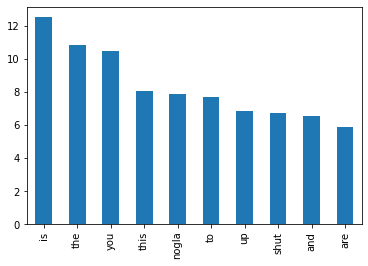

In [84]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

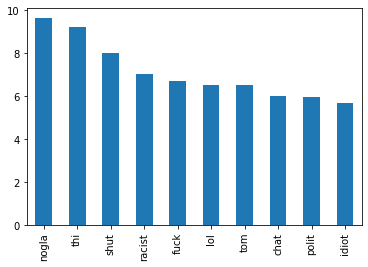

In [85]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Hate Speech

In [86]:
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(hSpe.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [87]:
#stop words removed
vectorizer = TfidfVectorizer()
hSpe = vectorizer.fit_transform(hSpeech['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(hSpe.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

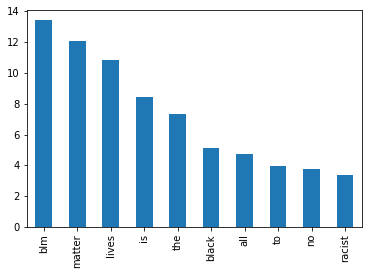

In [88]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

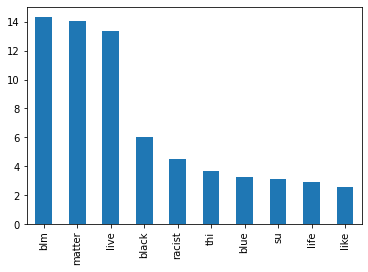

In [89]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Sexual Harassment

In [90]:
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(sHar.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [91]:
#stop words removed
vectorizer = TfidfVectorizer()
sHar = vectorizer.fit_transform(sHarassment['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(sHar.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

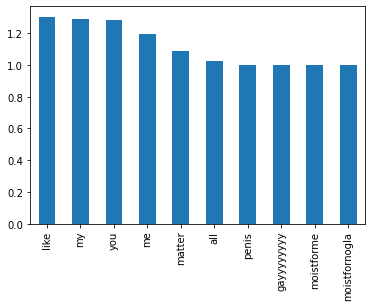

In [92]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

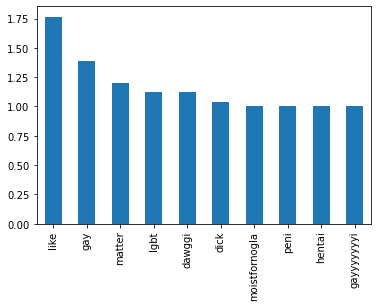

In [93]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Trolling

In [94]:
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(troll.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [95]:
#stop words removed
vectorizer = TfidfVectorizer()
troll = vectorizer.fit_transform(trolling['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(troll.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

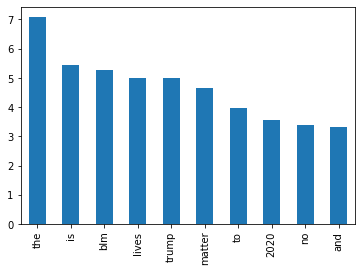

In [96]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

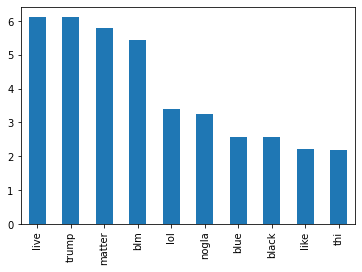

In [97]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Others

In [98]:
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(oth.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [99]:
#stop words removed
vectorizer = TfidfVectorizer()
oth = vectorizer.fit_transform(others['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(oth.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

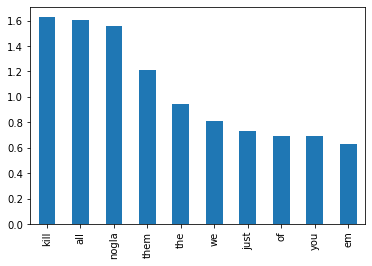

In [100]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

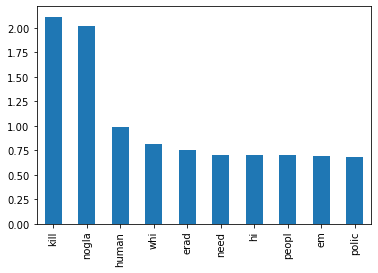

In [101]:
vals1 = vals1[0:10]
vals1.plot.bar()

#### TFIDF on Toxic

In [102]:
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['message'])
features = vectorizer.get_feature_names()

df = pd.DataFrame(tox.toarray(), columns=features)
vals = df.sum(axis = 0, skipna = True)
vals = vals.sort_values(ascending=False)

In [103]:
#stop words removed
vectorizer = TfidfVectorizer()
tox = vectorizer.fit_transform(toxic['stop_words'])
features = vectorizer.get_feature_names()

df1 = pd.DataFrame(tox.toarray(), columns=features)
vals1 = df1.sum(axis = 0, skipna = True)
vals1 = vals1.sort_values(ascending=False)

<AxesSubplot:>

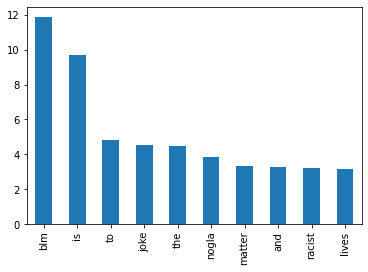

In [104]:
vals = vals[0:10]
vals.plot.bar()

<AxesSubplot:>

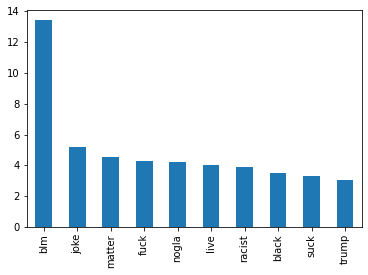

In [105]:
vals1 = vals1[0:10]
vals1.plot.bar()